In [1]:
!ls logs

In [2]:
import collections
import matplotlib.pyplot as plt

In [3]:
methods = ["converge1", 
           "pubhrl-center-circular-graduated", 
           "pubhrl-center-circular", 
           "pubhrl-circular-graduated", 
           "pubhrl",
           "pubhrl-block6-center-circular-graduated"]

In [4]:
texts = {}

for method in methods:
    with open("./logs/logs-{}.txt".format(method)) as f:
        texts[method] = f.readlines()

In [5]:
epochs = collections.defaultdict(list)
winrates_rulebase = collections.defaultdict(list)

for method in methods:
    for line in texts[method]:
        if "win rate (rulebase)" in line:
            winrates_rulebase[method].append(float(line.split()[4]))
        if "epoch " in line:
            epochs[method].append(int(line.split()[1]))

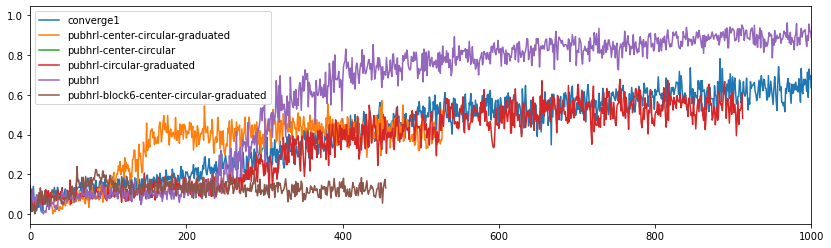

In [6]:
plt.figure(figsize=(14,4))
for method in methods:
    plt.plot(epochs[method], winrates_rulebase[method], label=method)
plt.legend()
plt.xlim(0,1000)
plt.show()

In [7]:
methods = [
    "pubhrl-trained-against-assorted",
    "pubhrl-trained-against-boiler-and-adverse", 
    "pubhrl-trained-against-boiler-crazy-sfbfs"
]

texts = {}

for method in methods:
    with open("./logs/logs-{}.txt".format(method)) as f:
        texts[method] = f.readlines()

In [8]:
epochs = collections.defaultdict(list)
winrates_rulebase = collections.defaultdict(lambda: collections.defaultdict(list))

for method in methods:
    for line in texts[method]:
        if "win rate" in line:
            winrate = float(line.split()[4])
            opponent = line.split()[2]
            winrates_rulebase[method][opponent].append(winrate)
        if "epoch " in line:
            epochs[method].append(int(line.split()[1]))

In [9]:
list(len(x) for x in epochs.values())

[23, 4832, 4124]

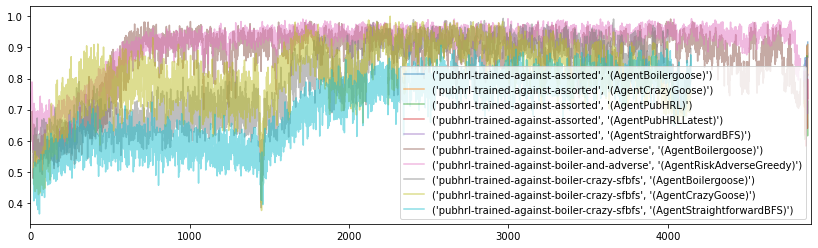

In [10]:
plt.figure(figsize=(14,4))
for method in winrates_rulebase:
    for opponent in winrates_rulebase[method]:
        if opponent == "(total)":
            continue
        plt.plot(epochs[method], winrates_rulebase[method][opponent], label=(method, opponent), alpha=0.5)
plt.legend()
plt.xlim(0,4900)
plt.show()